In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Salary.csv')
df.head()

# data preprocessing

# set target variable
# values.reshape turns the column into a 2D array
y = df['Salary'].values.reshape(-1, 1)

# enumerating columns with strings
# gender_enum = enumerate(df['Gender'].unique())
# job_title_enum = enumerate(df['Job Title'].unique())
# country_title_enum = enumerate(df['Country'].unique())
# race_title_enum = enumerate(df['Race'].unique())

# eliminating columns with strings and the column with the target variable
X = df.drop(columns=['Gender', 'Job Title', 'Salary', 'Country', 'Race'])

# data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_X = scaler.fit_transform(X)
normalized_Y = scaler.fit_transform(y)

# exploratory data analysis

# data is not standardized

In [4]:
# dataset statistics.
print(df.describe())
print("\n")

# attribute counts and their datatypes.
print(df.info())

               Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.622382             8.077723  115307.175194   
std       7.595994         0.880474             6.029305   52806.810881   
min      21.000000         0.000000             0.000000     350.000000   
25%      28.000000         1.000000             3.000000   70000.000000   
50%      32.000000         1.000000             7.000000  115000.000000   
75%      38.000000         2.000000            12.000000  160000.000000   
max      62.000000         3.000000            34.000000  250000.000000   

            Senior  
count  6684.000000  
mean      0.143477  
std       0.350585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               N

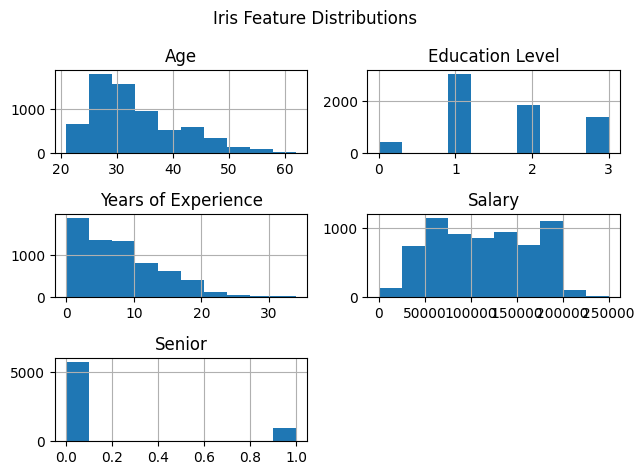

In [5]:
#histagram istribution.
df.hist()

plt.suptitle("Iris Feature Distributions")
plt.tight_layout()
plt.show()

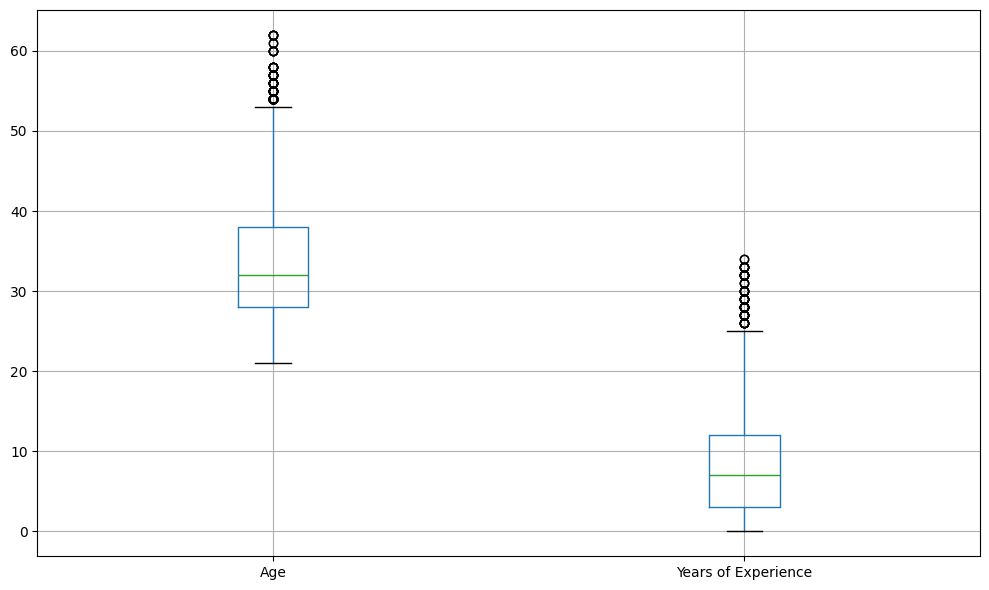

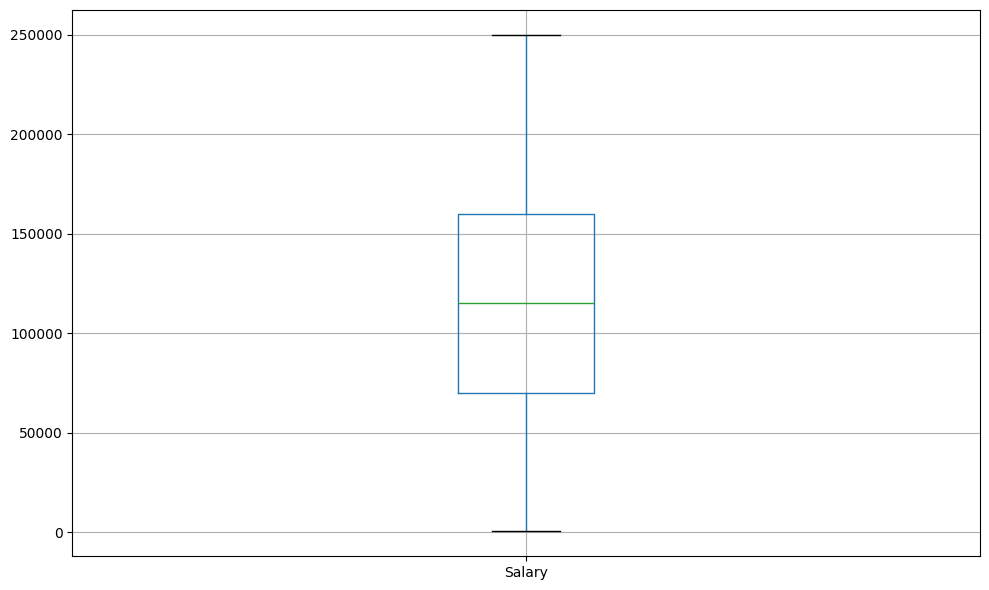

Age's upper outliers:
1209    61.0
1221    57.0
1223    62.0
1234    62.0
1238    55.0
        ... 
3041    54.0
3050    54.0
3067    54.0
3087    54.0
3103    54.0
Name: Age, Length: 119, dtype: float64
Years of Experience's upper outliers:
2382    30.0
2387    28.0
2391    33.0
2393    27.0
2396    33.0
        ... 
3059    26.0
3067    32.0
3087    30.0
3103    28.0
3109    26.0
Name: Years of Experience, Length: 69, dtype: float64


In [6]:
# find outliers with boxplot
df.boxplot(column=['Age', 'Years of Experience'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# salary graphed in a different graph because it has larger values
df.boxplot(column=['Salary'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# find outliers in data (use code from discussion 1)
col_to_graph =['Age', 'Years of Experience', 'Salary']
for feature in col_to_graph:  # calculate for each of the identified attributes
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
    lower_bound = q1 - 1.5 * iqr #lower line.
    upper_bound = q3 + 1.5 * iqr #upper line.
    #modify outliers to values.
    outliers_lower = df[feature] < lower_bound
    outliers_upper = df[feature] > upper_bound

    # print the outliers
    if outliers_upper.any():
        print(f"{feature}'s upper outliers:\n{df.loc[outliers_upper, feature]}")
    if outliers_lower.any():
        print(f"{feature}'s lower outliers:\n{df.loc[outliers_lower, feature]}")

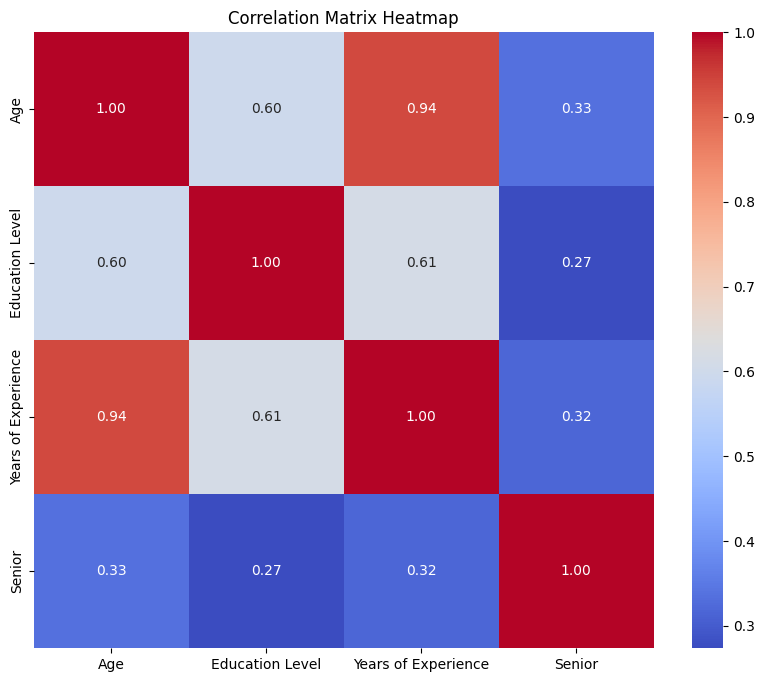

In [7]:
# finding correlation

# using normalized_X does not work because it is a numpy array

# find correlation (use code from lab 0)
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# feature selection
# eliminate features that are highly correlated to reduce overfitting and improve the overall accuracy of the model

# example: eliminate either age or years of experience because they have a correlation of 0.94
X = X.drop(columns=['Age'])

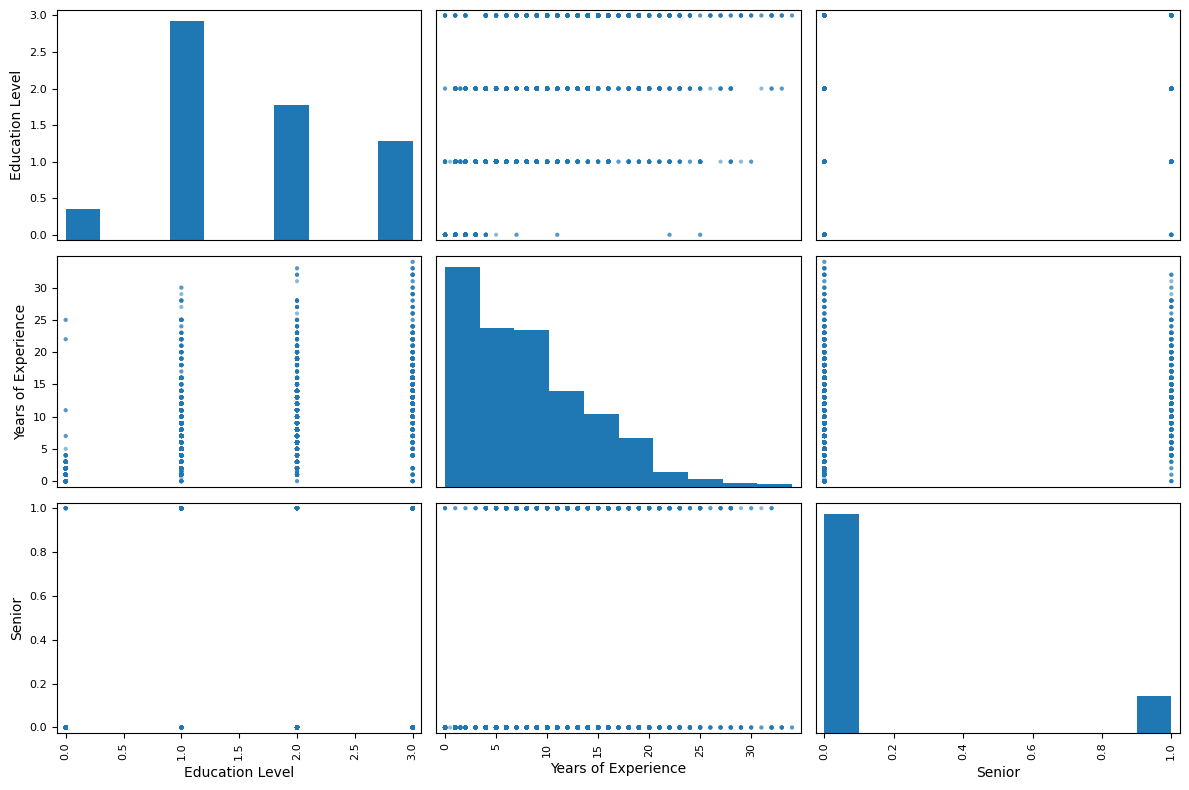

In [10]:
pd.plotting.scatter_matrix(X, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [8]:
X

,Education Level,Years of Experience,Senior
0,1,5.0,0
1,2,3.0,0
2,3,15.0,1
3,1,7.0,0
4,2,20.0,0
...,...,...,...
6679,3,20.0,0
6680,0,3.0,0
6681,1,4.0,0
6682,2,14.0,0


In [12]:
# model construction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear regression
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
    
# Scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
    
# train model on training data.
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)


860194030.7521405
0.6903588487695786
